In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal
from sklearn.metrics import mean_squared_error
import my_model_functions as model

Contrasts are :
1-255 (99%), 64-192(50%), 96-160(25%), 112-144(12.5%)

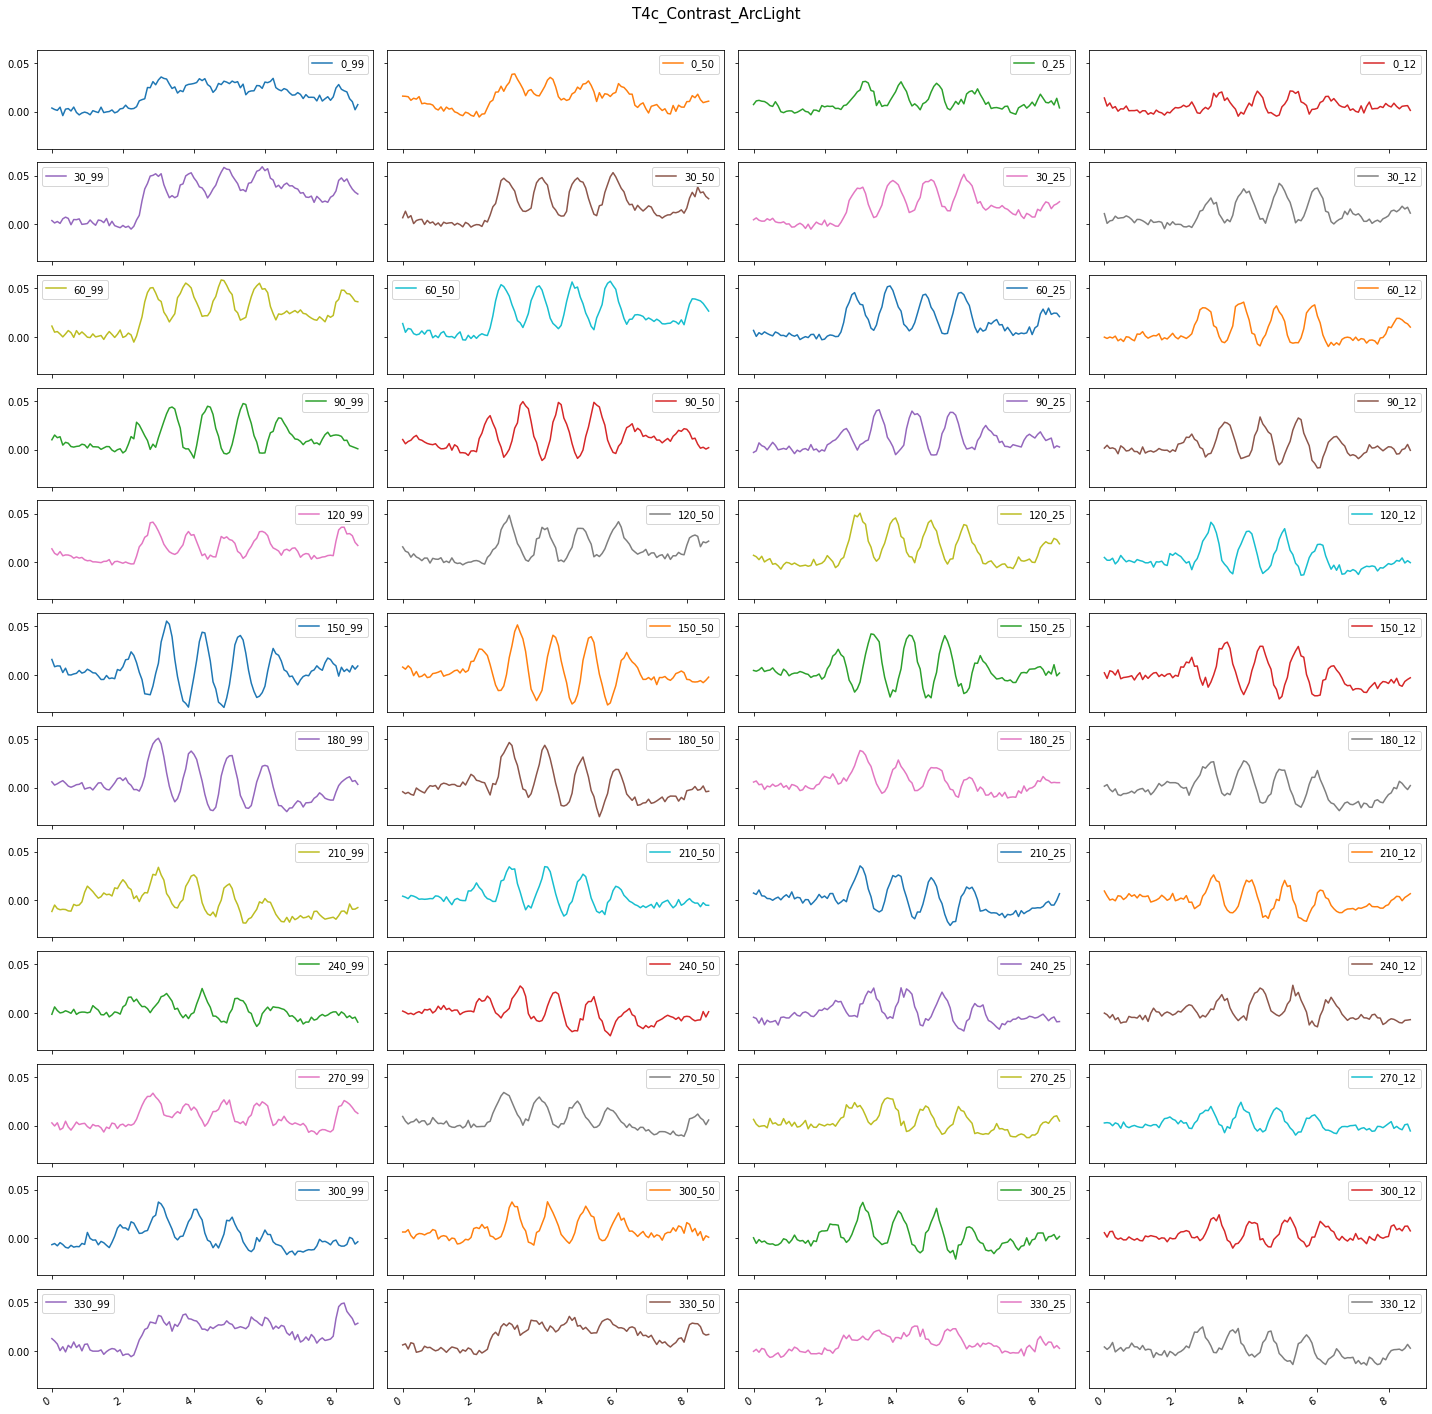

In [2]:
filename = 'data/T4c_ArcLight/ARCOri_Contrast_Mean.mat'
column = model.column_name(velocity = [99, 50, 25, 12])
data_Arclight = model.load_data(filename, column)
model.plot_data(data_Arclight.copy(), title='T4c_Contrast_ArcLight')

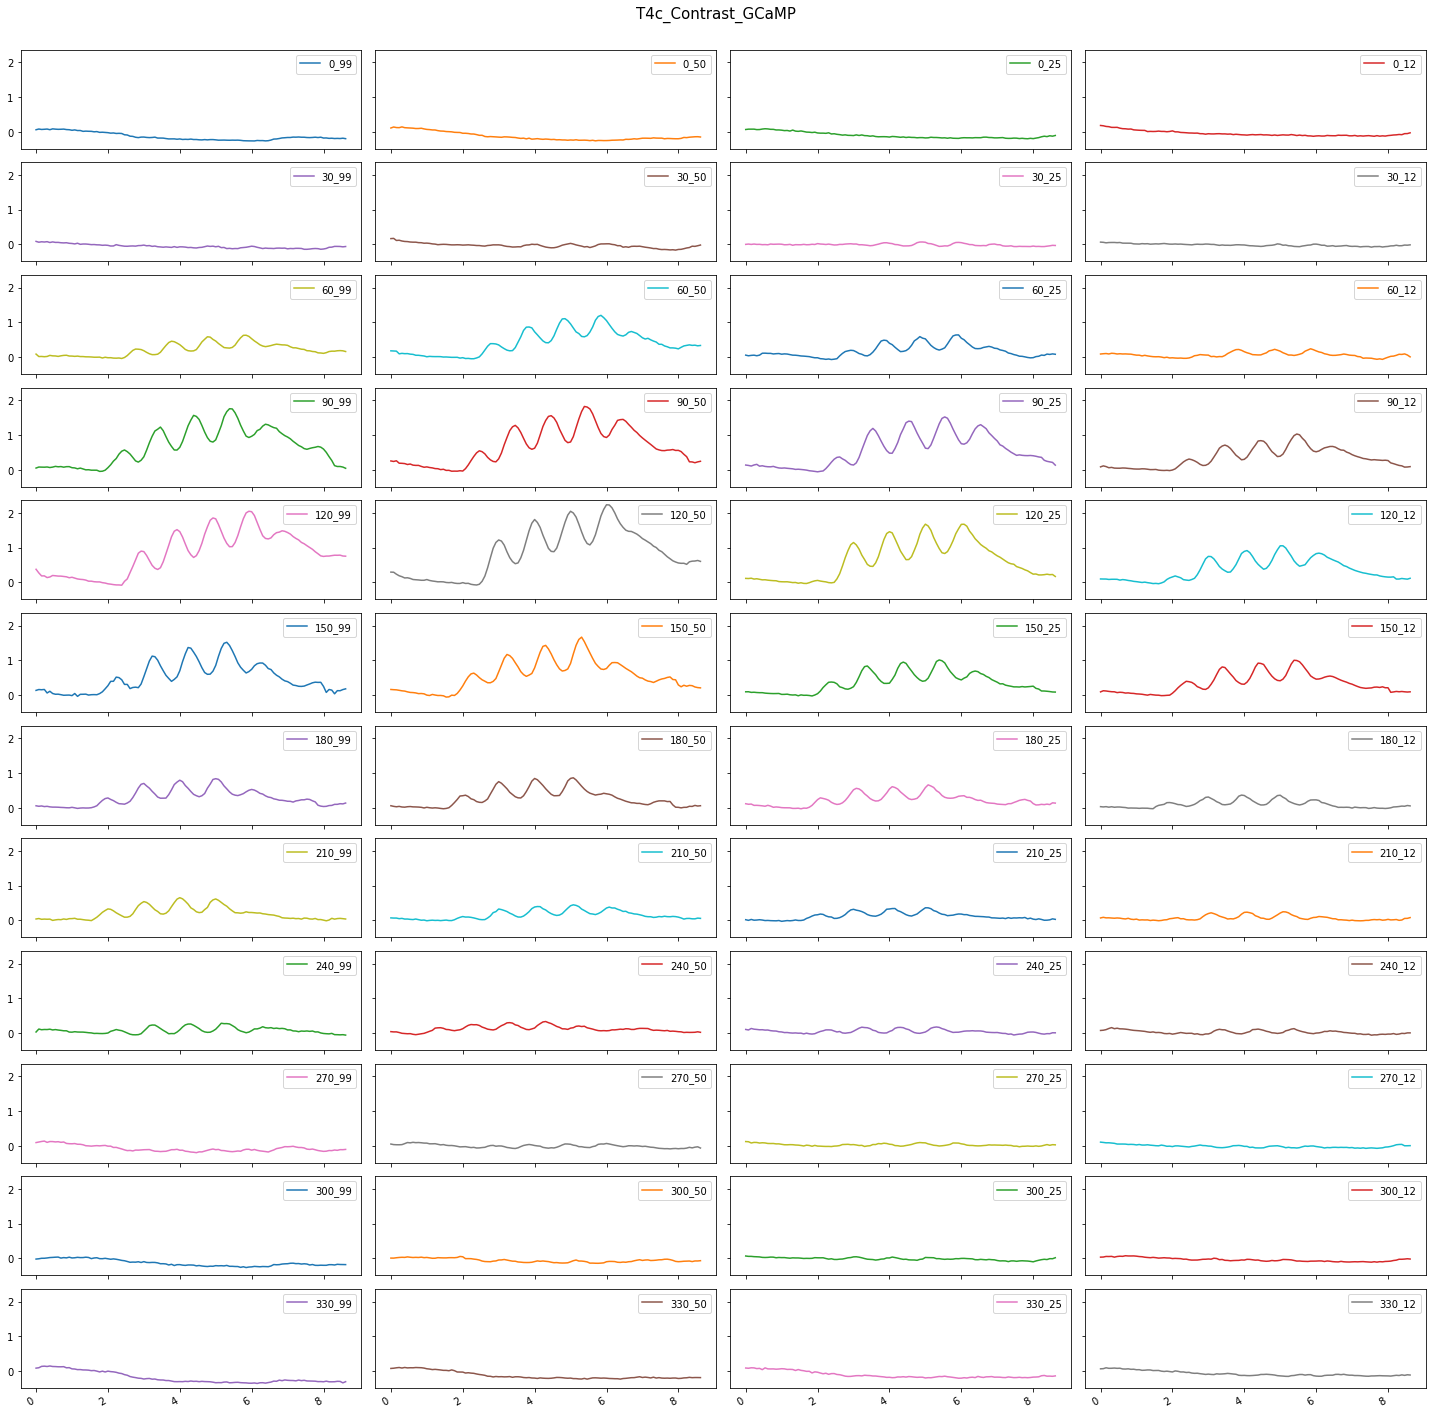

In [3]:
filename = 'data/T4c_GCaMP/Ori_Mean_Contrast.mat'
column = model.column_name(velocity = [99, 50, 25, 12])
data_Gcamp = model.load_data(filename, column)
model.plot_data(data_Gcamp.copy(), title='T4c_Contrast_GCaMP')

In [13]:
stim = model.column_name(velocity = [99, 50, 25, 12])

In [14]:
#Using optimal parameters from T4c_Gcamp_Ori_vel model
import json
with open('T4c_Gcamp_Ori_vel_model_parameters.json') as f:
    model_param = json.load(f)
thres_model = model_param['thres_model']
tau_model = model_param['tau_model']
gain_model = model_param['gain_model']
dt = model_param['dt']
thres_model, tau_model, gain_model, dt
#model_param

(0.026666666666666665, 1.4111111111111112, 45.55555555555556, 0.0769)

In [15]:
df_model = pd.DataFrame(columns = column)
for sti in stim:
    Arclight_data = data_Arclight[sti].copy()
    Gcamp_model = pd.Series(model.Ca_model(Arclight_data.copy(), tau_model, dt, thres_model, gain_model))
    df_model[sti] = Gcamp_model

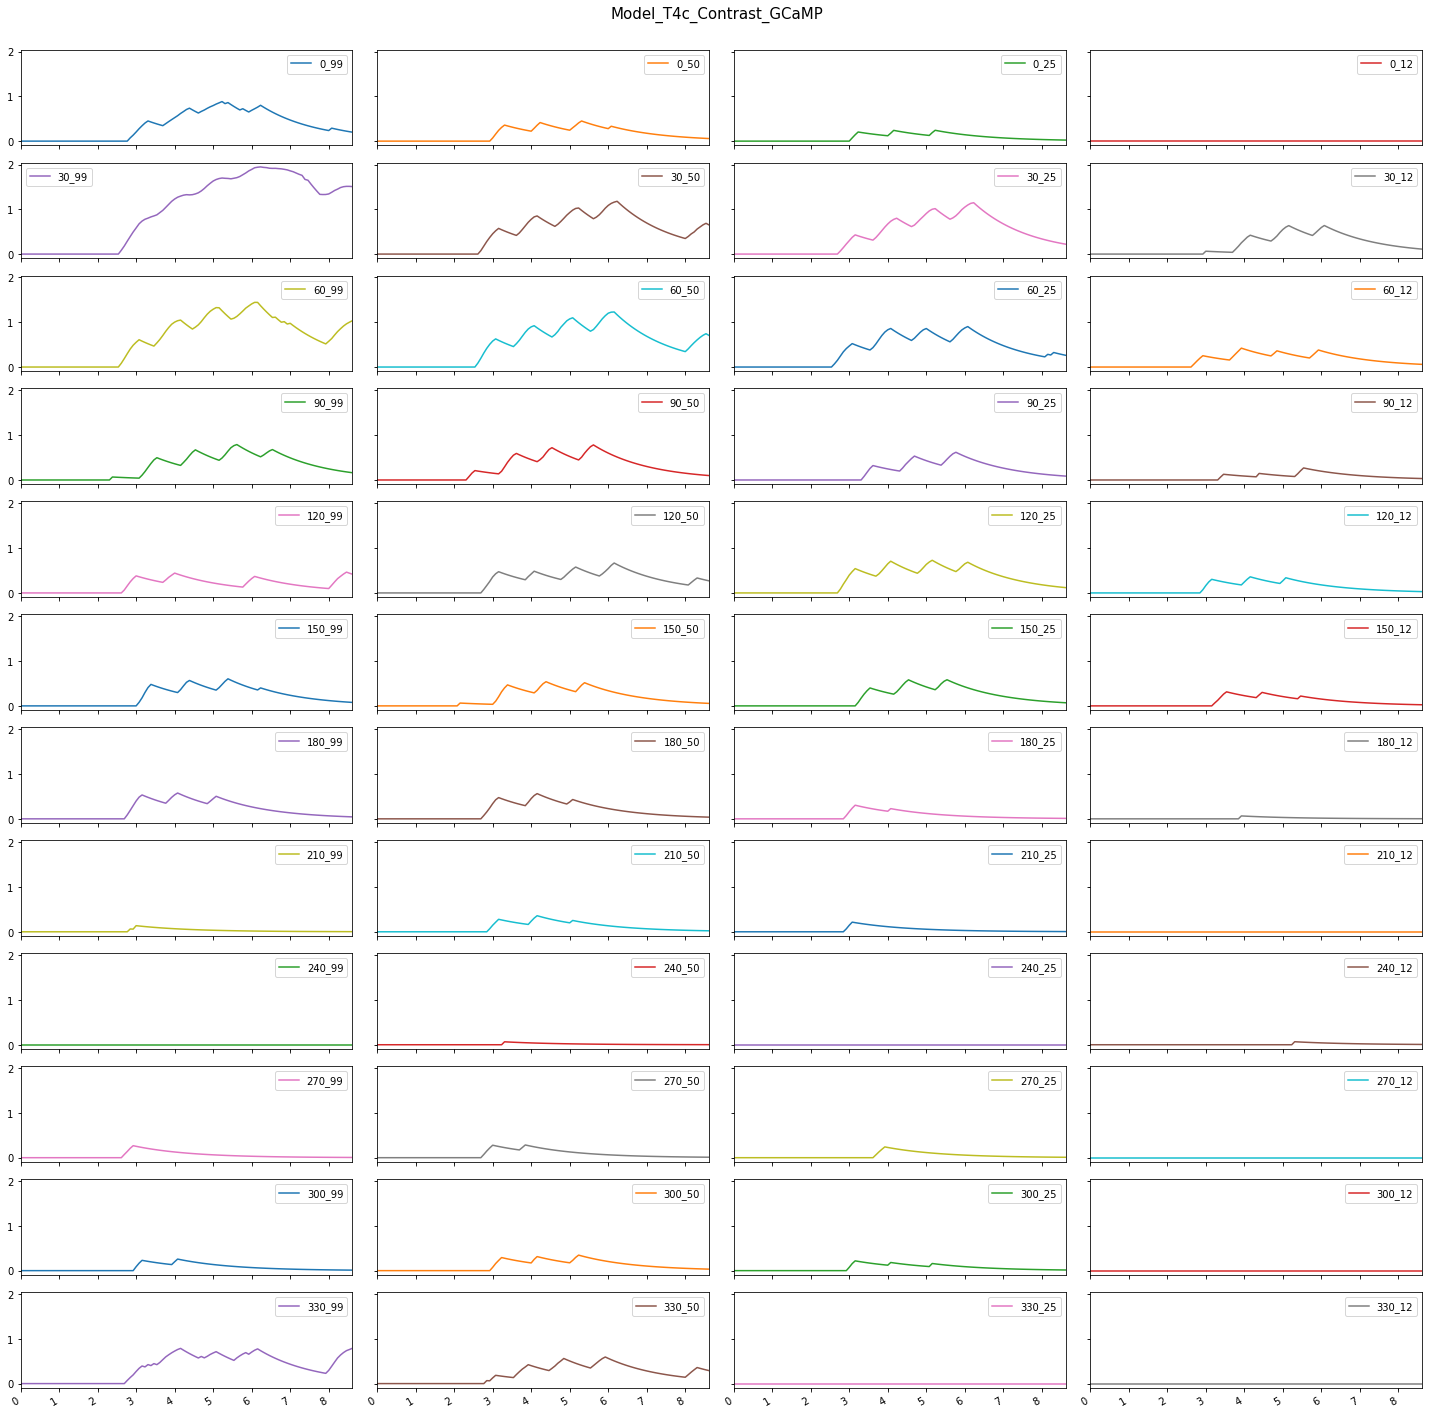

In [16]:
model.plot_data(df_model, title='Model_T4c_Contrast_GCaMP')

In [14]:
data_Gcamp.loc[20:90]['300_25'].max()

0.047987105101532895

In [74]:
shift_sti = []
for sti in stim:
    if data_Gcamp[sti].loc[20:90].max() >= 0.15:
        shift_sti.append(sti)
#shift_sti #shift stimulus only for these signals

In [75]:
dt=0.0769
thres = np.linspace(-0.04, 0.06, 10)
tau =np.linspace(0.05,4.0,15)
gain = np.linspace(30.0, 100.0, 10)
error = np.zeros((len(thres), len(tau), len(gain)))
for i in range(len(thres)):
    for j in range(len(tau)):
        for k in range(len(gain)):
            err_= 0
            for sti in stim:
                Gcamp_data = data_Gcamp[sti].copy()
                Arclight_data = data_Arclight[sti].copy()
                Gcamp_model = pd.Series(model.Ca_model(Arclight_data.copy(), tau[j], dt, thres[i], gain[k]))
                if sti in shift_sti:
                    shift = model.shift_signal_peak(Gcamp_model, Gcamp_data, vel=30.0)
                else:
                    shift = 0
                Gcamp_model.index = Gcamp_model.index - shift
                err_ += mean_squared_error(Gcamp_model.loc[20:90].values, Gcamp_data.loc[20:90].values)
            error[i, j, k] = err_/len(stim)
error.min()

0.17019503462282734

In [76]:
# dt=0.0769
# thres = np.linspace(-0.04, 0.06, 10)
# tau =np.linspace(0.05,3.0,10)
# gain = np.linspace(30.0, 100.0, 10)
# error = np.zeros((len(thres), len(tau), len(gain)))
# for i in range(len(thres)):
#     for j in range(len(tau)):
#         for k in range(len(gain)):
#             err_= 0
#             for sti in stim:
#                 Gcamp_data = data_Gcamp[sti].copy()
#                 Arclight_data = data_Arclight[sti].copy()
#                 Gcamp_model = pd.Series(model.Ca_model(Arclight_data.copy(), tau[j], dt, thres[i], gain[k]))
#                 err_ += (Gcamp_model.loc[20:90].max() - Gcamp_data.loc[20:90].max())**2
#             error[i, j, k] = err_/len(stim)
# error.min()

In [80]:
thres_model = thres[np.argwhere(error == np.min(error))[0][0]]
tau_model = tau[np.argwhere(error == np.min(error))[0][1]]
gain_model = gain[np.argwhere(error == np.min(error))[0][2]]
thres_model, tau_model, gain_model 

(0.004444444444444445, 4.0, 30.0)

In [81]:
df_model = pd.DataFrame(columns = column)
for sti in stim:
    Arclight_data = data_Arclight[sti].copy()
    Gcamp_model = pd.Series(model.Ca_model(Arclight_data.copy(), tau_model, dt, thres_model, gain_model))
    df_model[sti] = Gcamp_model

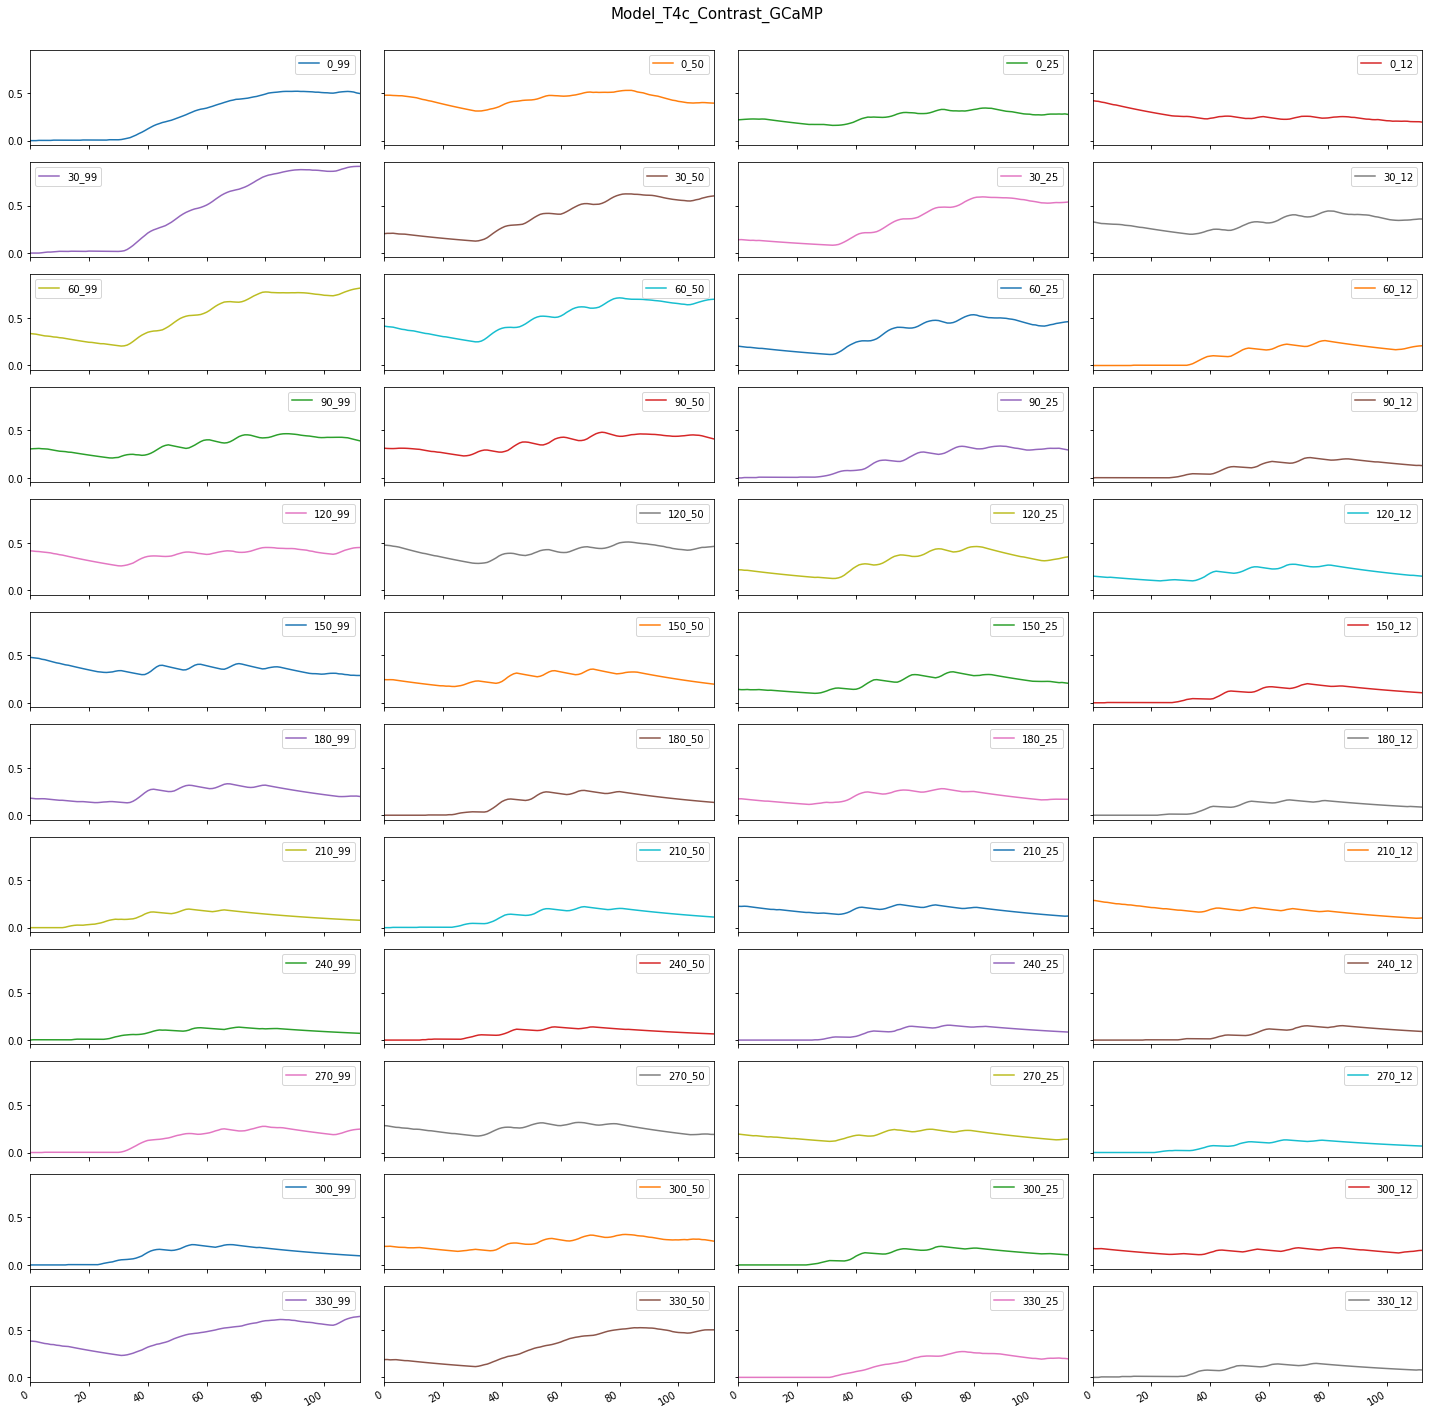

In [79]:
model.plot_data(df_model, title='Model_T4c_Contrast_GCaMP')

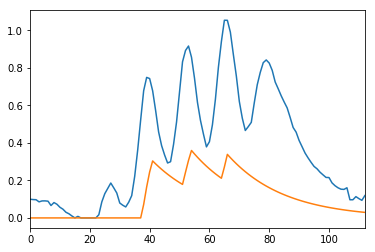

In [58]:
stim ='120_12'
data_Gcamp[stim].plot();
plt.plot(model.Ca_model(data_Arclight[stim], tau_model, dt, thres_model, gain_model));

In [59]:
data_Gcamp[stim].loc[70:90].idxmax()

79

In [60]:
pd.Series(model.Ca_model(data_Arclight[stim], tau_model, 
               dt, thres_model, gain_model)).loc[70:90].idxmax()

70

In [45]:
dt=0.0769
(thres_model, tau_model, gain_model) = (0.026666666666666665, 
                                        1.4111111111111112, 
                                        45.55555555555556)
stim = model.column_name(velocity = [99, 50, 25, 12])
#stim

In [46]:
df_model = pd.DataFrame(columns = column)
for sti in stim:
    Arclight_data = data_Arclight[sti].copy()
    Gcamp_model = pd.Series(model.Ca_model(Arclight_data.copy(), tau_model, dt, thres_model, gain_model))
    df_model[sti] = Gcamp_model

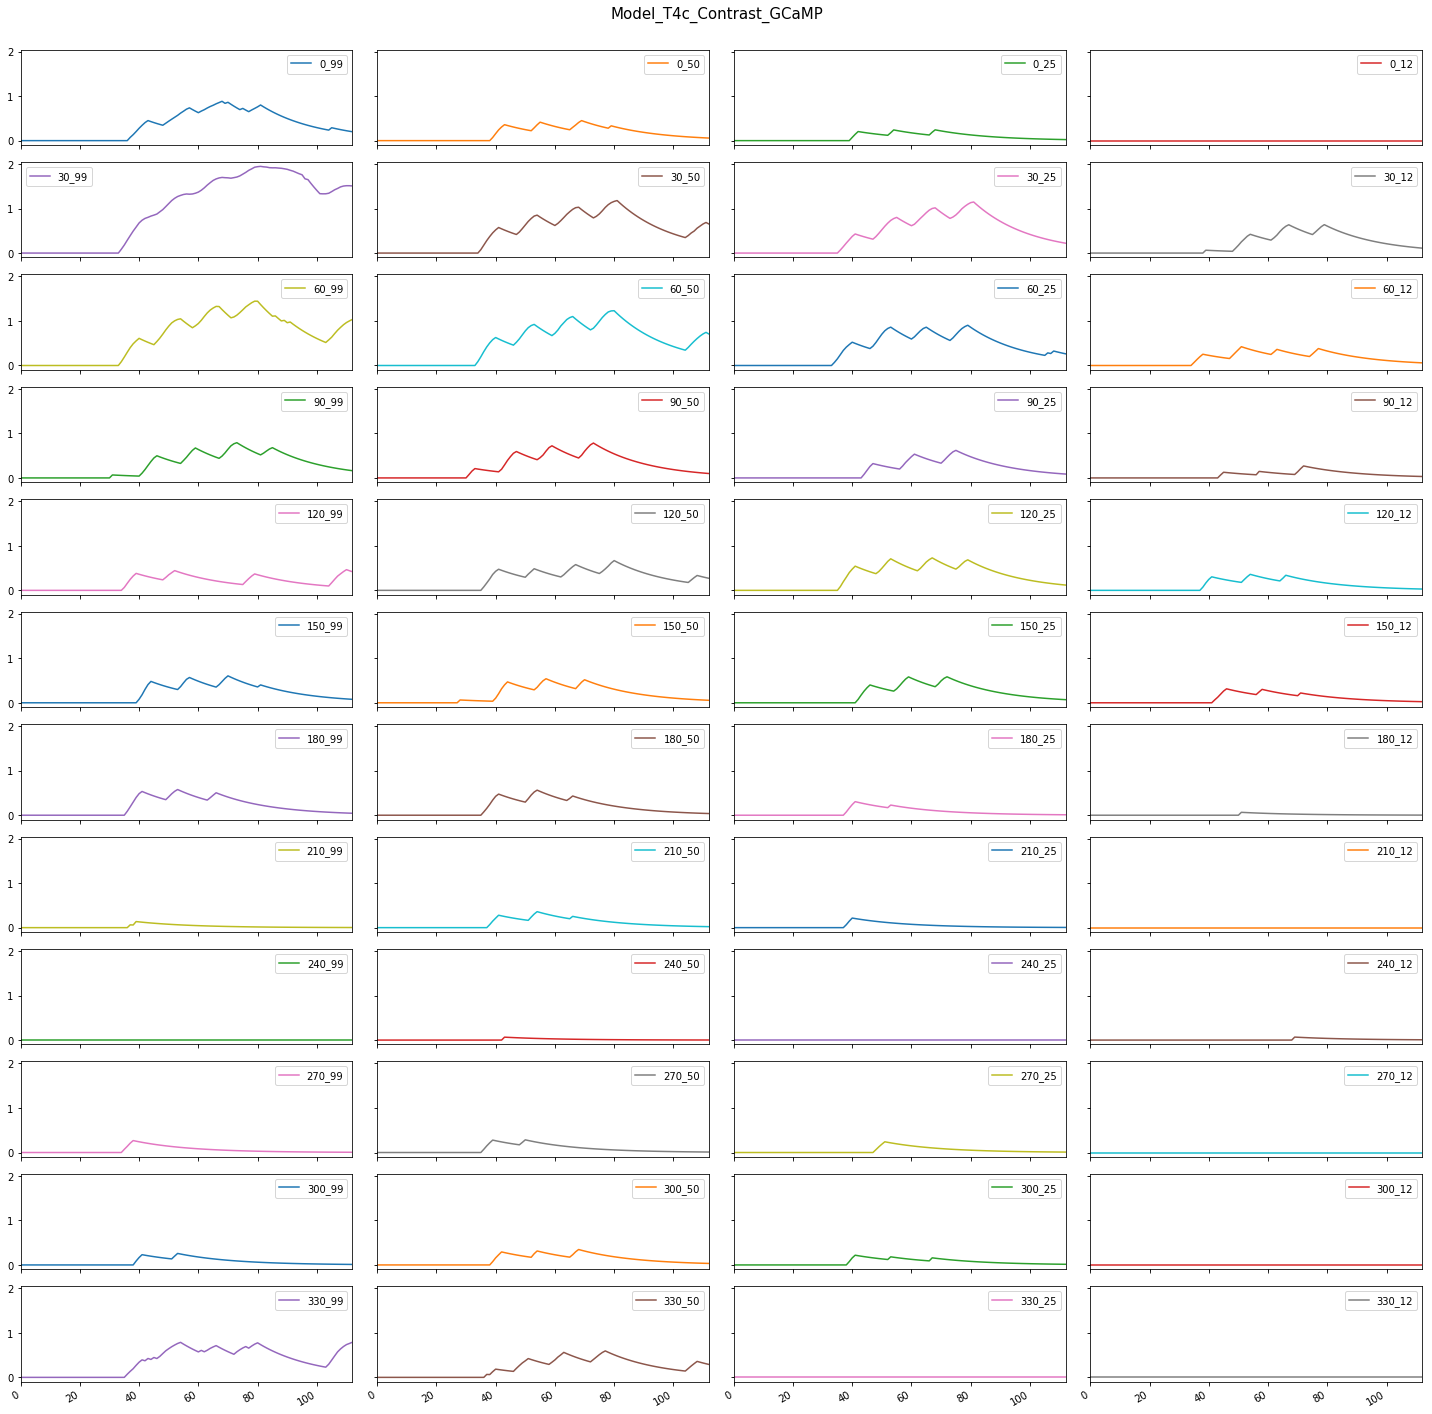

In [47]:
model.plot_data(df_model, title='Model_T4c_Contrast_GCaMP')